# Import libraries

In [ ]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style("whitegrid")

# Load data

## Seattle, Washington data

In [ ]:
df_sea = pd.read_csv("../data/seattle_rain.csv")

type(df_sea)

pandas.core.frame.DataFrame

In [136]:
df_sea.head()
#df_sea.head(10)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


## Portland, Maine data

In [137]:
df_pwm = pd.read_csv("../data/portland_rain.csv")
type(df_pwm)

pandas.core.frame.DataFrame

In [138]:
df_pwm.head()
#df_pwm.head(10)

,STATION,NAME,DATE,PRCP,SNOW,SNWD
0,USW00014764,"PORTLAND JETPORT, ME US",2018-01-01,0.00,0.0,9.1
1,USW00014764,"PORTLAND JETPORT, ME US",2018-01-02,0.00,0.0,9.1
2,USW00014764,"PORTLAND JETPORT, ME US",2018-01-03,0.00,0.0,7.9
3,USW00014764,"PORTLAND JETPORT, ME US",2018-01-04,0.62,11.9,7.9
4,USW00014764,"PORTLAND JETPORT, ME US",2018-01-05,0.01,0.1,16.1


# Data checking

## Seattle, WA

In [139]:
df_sea.info()
print()

print("# Unique Stations:", df_sea['STATION'].nunique())
print()

print(df_sea['DATE'].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB

# Unique Stations: 1

object


In [140]:
df_sea['DATE'] = pd.to_datetime(df_sea['DATE'])

#df_sea.info()

C:\Users\Travis\AppData\Local\Temp\ipykernel_20400\664725293.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sea['DATE'] = pd.to_datetime(df_sea['DATE'])


In [141]:
print("SEA Min Date:", df_sea['DATE'].min())

print("SEA Max Date", df_sea['DATE'].max())

SEA Min Date: 2018-01-01 00:00:00
SEA Max Date 2022-12-31 00:00:00


## Portland, ME

In [142]:
df_pwm.info()
print()

print("# Unique Stations:", df_pwm['STATION'].nunique())
print()

print(df_pwm['DATE'].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1826 non-null   object 
 1   NAME     1826 non-null   object 
 2   DATE     1826 non-null   object 
 3   PRCP     1826 non-null   float64
 4   SNOW     1826 non-null   float64
 5   SNWD     1826 non-null   float64
dtypes: float64(3), object(3)
memory usage: 85.7+ KB

# Unique Stations: 1

object


In [143]:
df_pwm['DATE'] = pd.to_datetime(df_pwm['DATE'])

#df_pwm.info()

In [144]:
print("PWM Min Date:", df_pwm['DATE'].min())

print("PWM Max Date", df_pwm['DATE'].max())

PWM Min Date: 2018-01-01 00:00:00
PWM Max Date 2022-12-31 00:00:00


# Data processing

## Joining Dataframes

In [145]:
df = df_sea[['DATE', 'PRCP']].merge(df_pwm[['DATE', 'PRCP']], on = 'DATE', how = 'outer')

print(df.head()) # PRCP_x is SEA, PRCP_y is PWM
print("Shape: ", df.shape)

        DATE  PRCP_x  PRCP_y
0 2018-01-01    0.00    0.00
1 2018-01-02    0.00    0.00
2 2018-01-03    0.00    0.00
3 2018-01-04    0.00    0.62
4 2018-01-05    0.25    0.01
Shape:  (1826, 3)


In [146]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'city', value_name = 'precipitation')

print(df.head())
print()

print(df.tail())

        DATE    city  precipitation
0 2018-01-01  PRCP_x           0.00
1 2018-01-02  PRCP_x           0.00
2 2018-01-03  PRCP_x           0.00
3 2018-01-04  PRCP_x           0.00
4 2018-01-05  PRCP_x           0.25

           DATE    city  precipitation
3647 2022-12-27  PRCP_y           0.00
3648 2022-12-28  PRCP_y           0.01
3649 2022-12-29  PRCP_y           0.00
3650 2022-12-30  PRCP_y           0.00
3651 2022-12-31  PRCP_y           0.05


## Cleaning

In [147]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'SEA'
df.loc[df['city'] == 'PRCP_y', 'city'] = 'PWM'

print(df.head())
print()

print(df.tail())

        DATE city  precipitation
0 2018-01-01  SEA           0.00
1 2018-01-02  SEA           0.00
2 2018-01-03  SEA           0.00
3 2018-01-04  SEA           0.00
4 2018-01-05  SEA           0.25

           DATE city  precipitation
3647 2022-12-27  PWM           0.00
3648 2022-12-28  PWM           0.01
3649 2022-12-29  PWM           0.00
3650 2022-12-30  PWM           0.00
3651 2022-12-31  PWM           0.05


In [148]:
df = df.rename(columns = {'DATE': 'date'})

print(df.head())
print()

print(df.tail())

        date city  precipitation
0 2018-01-01  SEA           0.00
1 2018-01-02  SEA           0.00
2 2018-01-03  SEA           0.00
3 2018-01-04  SEA           0.00
4 2018-01-05  SEA           0.25

           date city  precipitation
3647 2022-12-27  PWM           0.00
3648 2022-12-28  PWM           0.01
3649 2022-12-29  PWM           0.00
3650 2022-12-30  PWM           0.00
3651 2022-12-31  PWM           0.05


### Handling missing values

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


In [150]:
print("Seattle NaN:", df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum())
print("Portland NaN:", df.loc[df['city'] == 'PWM', 'precipitation'].isna().sum())

Seattle NaN: 190
Portland NaN: 0


In [151]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

print(df.head())

        date city  precipitation  day_of_year
0 2018-01-01  SEA           0.00            1
1 2018-01-02  SEA           0.00            2
2 2018-01-03  SEA           0.00            3
3 2018-01-04  SEA           0.00            4
4 2018-01-05  SEA           0.25            5


In [152]:
# mean precipitation for each inidi
mean_day_precipitation = df.loc[
    df['city'] == 'SEA',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

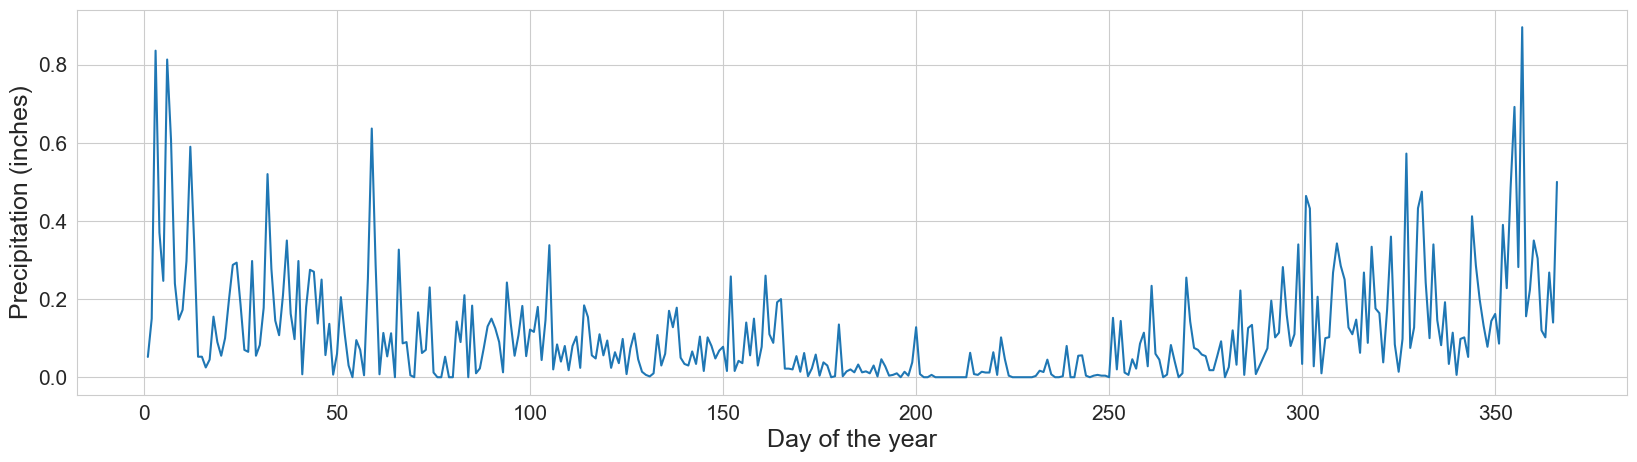

In [153]:
plt.figure(figsize = (20, 5))

sns.lineplot(data = mean_day_precipitation, x = 'day_of_year', y = 'precipitation')

plt.xlabel('Day of the year', fontsize = 18)
plt.ylabel('Precipitation (inches)', fontsize = 18)

plt.tick_params(labelsize = 15)

plt.show()

In [154]:
indices = np.where(df['precipitation'].isna() == True)[0]

print(indices)

[   8    9   10   11   12   13   14   15   16   17   18   19   20   21
   22   23   24   25   26   27   28   29   30   31   32   33   34   35
   36   37   38   39   40   41   42   43   44   45   46   47   48   49
   50   51   52   53   54   55   56   57   58   59   60   61   62   63
   64   65   66   67   68   69  264  305  306  307  308  309  310  311
  312  313  314  369  370  371  388  389  418  419  420  421  422  423
  460  461  462  536  537  542  543  544  545  546  547  548  549  550
  551  591  592  593  594  595  596  597  691  692  693  694  695  696
  697  698  733  734  735  776  777  778  779  780  781  782  783  784
  785  786  992  993  994  995  996  997  998  999 1000 1001 1146 1147
 1148 1149 1157 1158 1160 1161 1162 1174 1175 1178 1179 1180 1181 1182
 1185 1186 1187 1188 1189 1190 1307 1308 1309 1321 1322 1323 1324 1325
 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335 1336 1337 1537 1538
 1539 1540 1541 1542 1543 1544 1545 1546]


In [155]:
for index in indices:
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index, 'day_of_year']].values[0]

print(df.isna().sum())

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64


## Exporting

In [156]:
df.to_csv('clean_sea_pwm_weather.csv', encoding = 'utf-8-sig', index = False)

# Exploratory Data Analysis

## Descriptive Statistics

In [157]:
# Stats by city
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                               
             count      mean       std  min  25%   50%   75%  max
city                                                             
PWM         1826.0  0.130482  0.336819  0.0  0.0  0.00  0.05  3.4
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.6

In [158]:
# Mean daily precipitation
df[['city', 'precipitation']].groupby('city').mean()

,precipitation
city,
PWM,0.130482
SEA,0.113270


In [159]:
# Precipitation by month
df['month'] = pd.DatetimeIndex(df['date']).month

print(df.head())
print()

print(df['month'].unique())

        date city  precipitation  day_of_year  month
0 2018-01-01  SEA           0.00            1      1
1 2018-01-02  SEA           0.00            2      1
2 2018-01-03  SEA           0.00            3      1
3 2018-01-04  SEA           0.00            4      1
4 2018-01-05  SEA           0.25            5      1

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [160]:
# Mean Monthly Precipitation
print(df[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean())

            precipitation
city month               
PWM  1           0.111935
     2           0.132624
     3           0.097871
     4           0.164533
     5           0.067226
     6           0.107400
     7           0.124065
     8           0.118065
     9           0.102400
     10          0.195226
     11          0.183933
     12          0.161871
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903


In [161]:
# Days with precipitation (proportion)
df['any_precipitation'] = df['precipitation'] > 0

print(df.head())

        date city  precipitation  day_of_year  month  any_precipitation
0 2018-01-01  SEA           0.00            1      1              False
1 2018-01-02  SEA           0.00            2      1              False
2 2018-01-03  SEA           0.00            3      1              False
3 2018-01-04  SEA           0.00            4      1              False
4 2018-01-05  SEA           0.25            5      1               True


## Visualizations

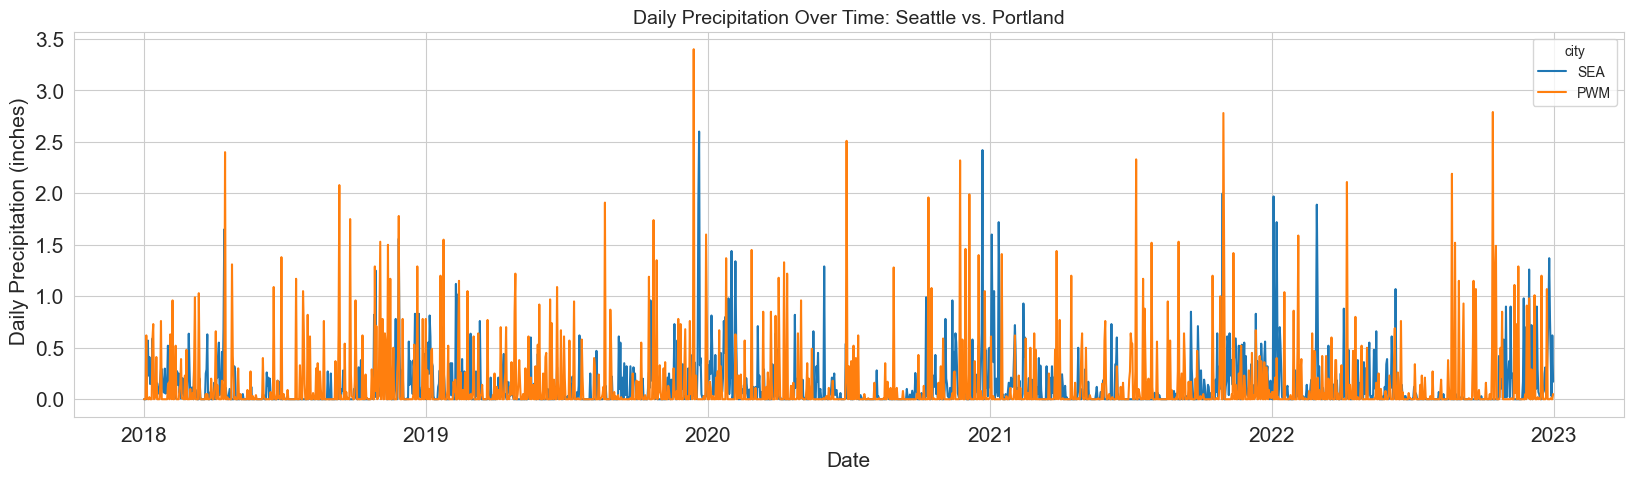

In [162]:
# Daily Precipitation Over Time: Seattle vs. Portland
plt.figure(figsize = (20, 5))

sns.lineplot(data =  df, x = 'date', y = 'precipitation', hue = 'city')

plt.title("Daily Precipitation Over Time: Seattle vs. Portland", fontsize=14)
plt.xlabel("Date", fontsize = 15)
plt.ylabel(" Daily Precipitation (inches)", fontsize = 15)

plt.tick_params(labelsize = 15)
plt.show()

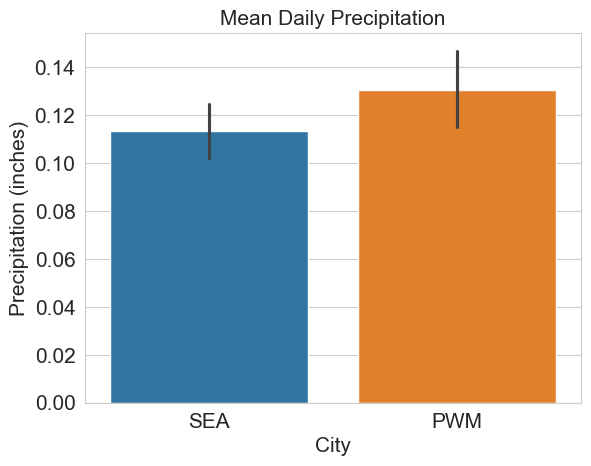

In [163]:
# Mean Daily Precipitation
sns.barplot(data = df, x = 'city', y = 'precipitation', hue = 'city')

plt.title('Mean Daily Precipitation', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)
plt.xlabel('City', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.show()


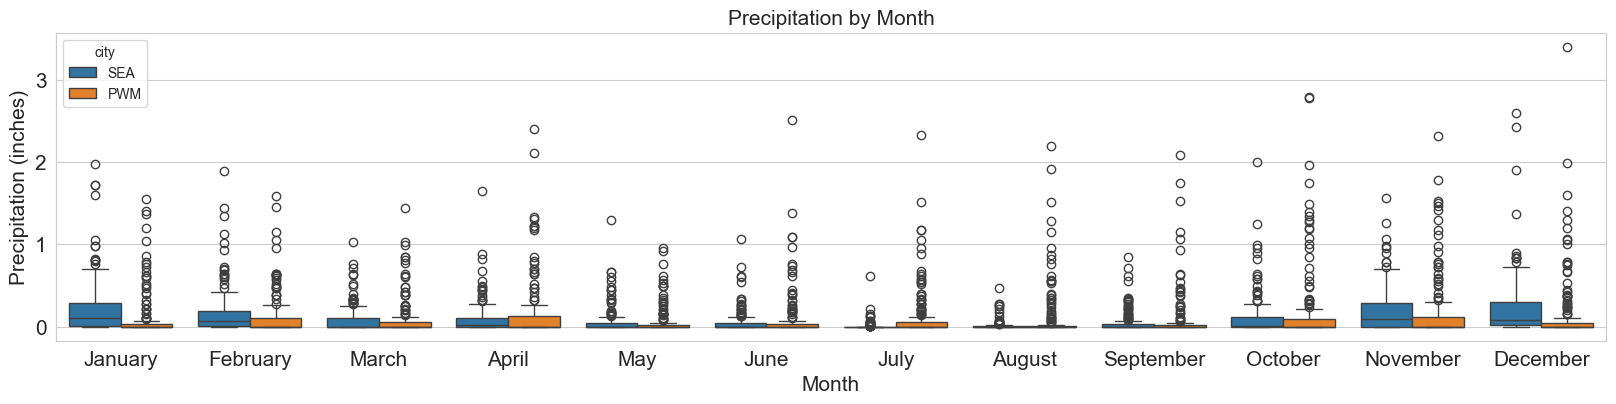

In [164]:
# Precipitation by month (boxplot)
plt.figure(figsize = (20, 4))

sns.boxplot(data = df, x  = 'month', y = 'precipitation', hue = 'city')

plt.title('Precipitation by Month', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)

import calendar
month_names = list(calendar.month_name[1:])
plt.xticks(ticks = range(12), labels = month_names)

plt.show()

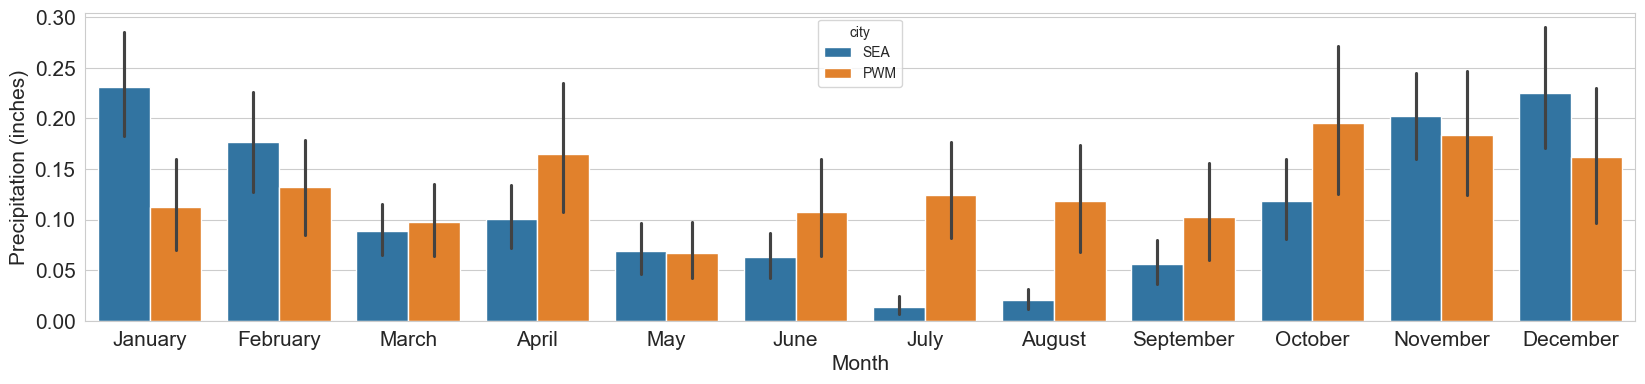

In [165]:
# Precipitation by month (barplot)
plt.figure(figsize=(20, 4))

sns.barplot(data = df, x = 'month', y = 'precipitation', hue = 'city') 

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.xticks(ticks=range(12), labels = month_names)

plt.show()

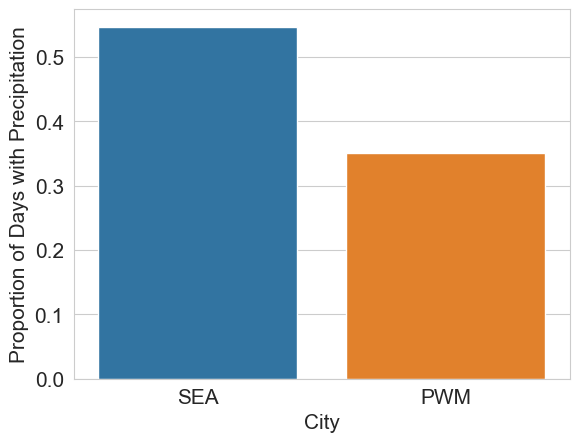

In [166]:
# Days with precipitation (total proportion)
sns.barplot(data = df, x = 'city', y = 'any_precipitation', errorbar = None, hue = 'city')

plt.xlabel('City', fontsize = 15)
plt.ylabel('Proportion of Days with Precipitation', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.show()

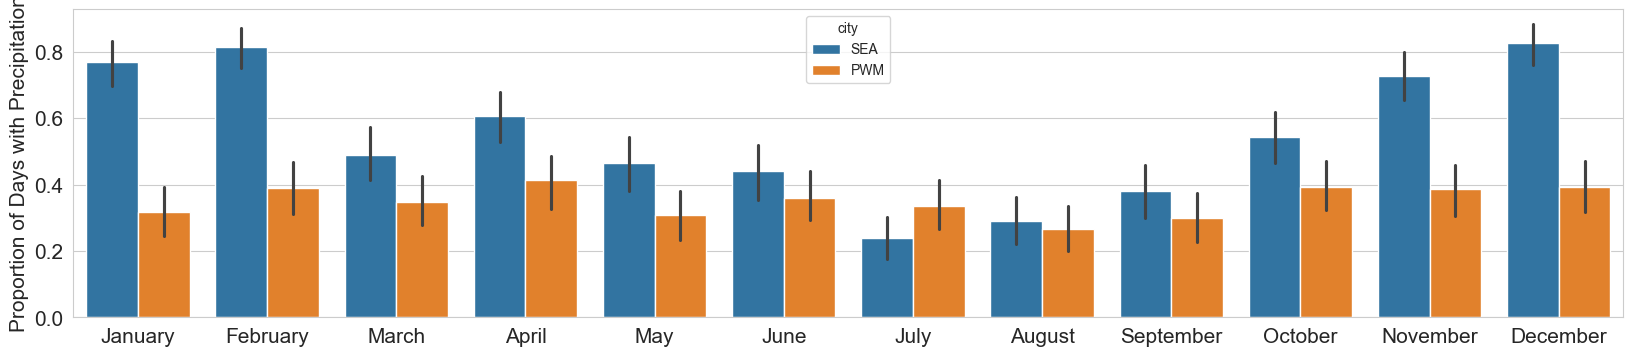

In [ ]:
# Days with precipitation (monthly proportion)
plt.figure(figsize = (20, 4))

sns.barplot(data = df, x = 'month', y = 'any_precipitation', hue = 'city')

plt.xlabel(None)
plt.ylabel('Proportion of Days with Precipitation', fontsize = 15)

plt.xticks(ticks = range(12), labels = month_names)
plt.tick_params(labelsize = 15)

plt.show()

### Select Visualizations

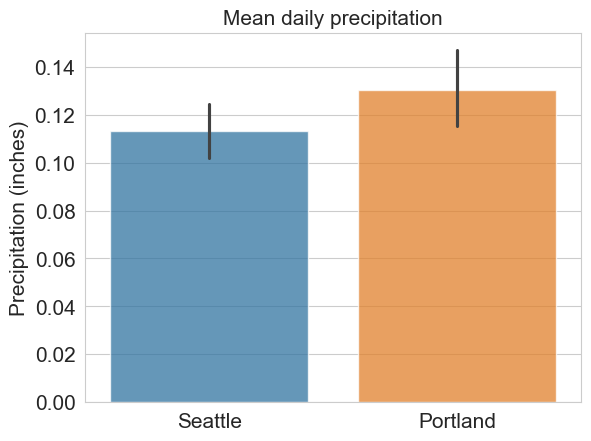

In [168]:
# Mean daily precipitation
sns.barplot(data = df, x = 'city', y = 'precipitation', hue = 'city', alpha = 0.75)

plt.title('Mean daily precipitation', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)
plt.xlabel(None)

plt.xticks([0, 1], ['Seattle', 'Portland'])

plt.tick_params(labelsize = 15)

plt.show()

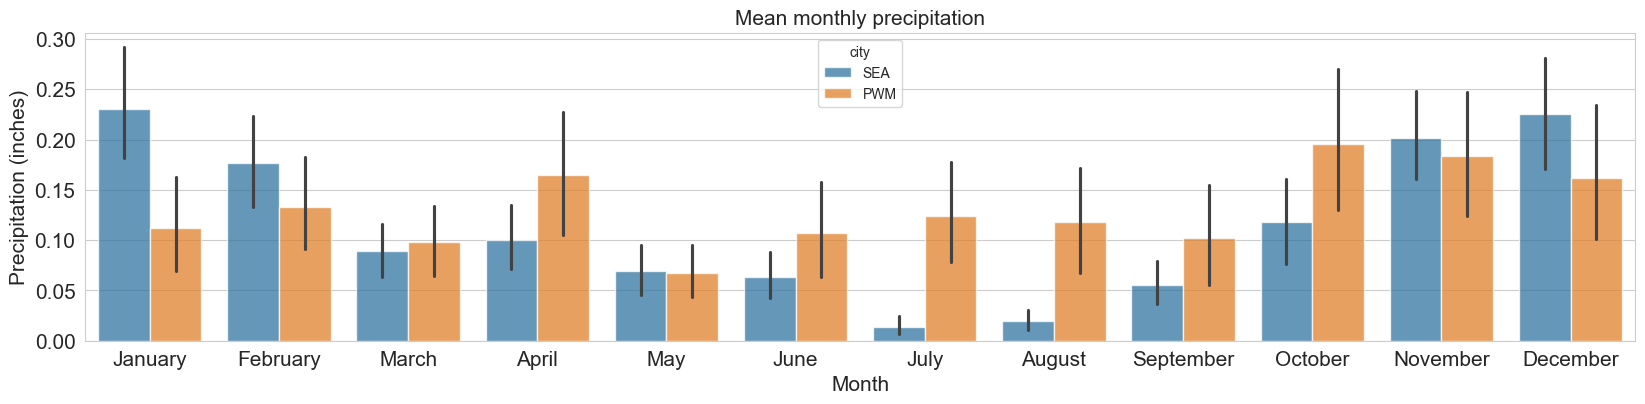

In [169]:
# Mean monthly precipitation
plt.figure(figsize = (20, 4))

sns.barplot(data = df, x = 'month', y = 'precipitation', hue = 'city', alpha = 0.75)

plt.title('Mean monthly precipitation', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.xticks(ticks=range(12), labels = month_names)

plt.show()

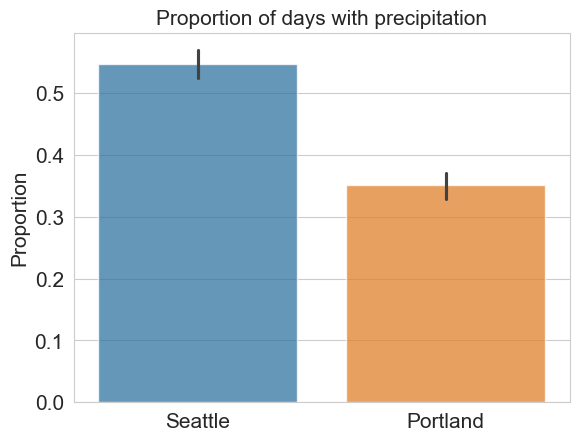

In [170]:
# Proportion of days with precipitation (total)
sns.barplot(data = df, x = 'city', y = 'any_precipitation', hue = 'city', alpha = 0.75)

plt.ylabel('Proportion', fontsize=15)
plt.xlabel(None)
plt.title('Proportion of days with precipitation', fontsize = 15)

plt.xticks([0, 1], ['Seattle', 'Portland'])

plt.tick_params(labelsize = 15)

plt.show()

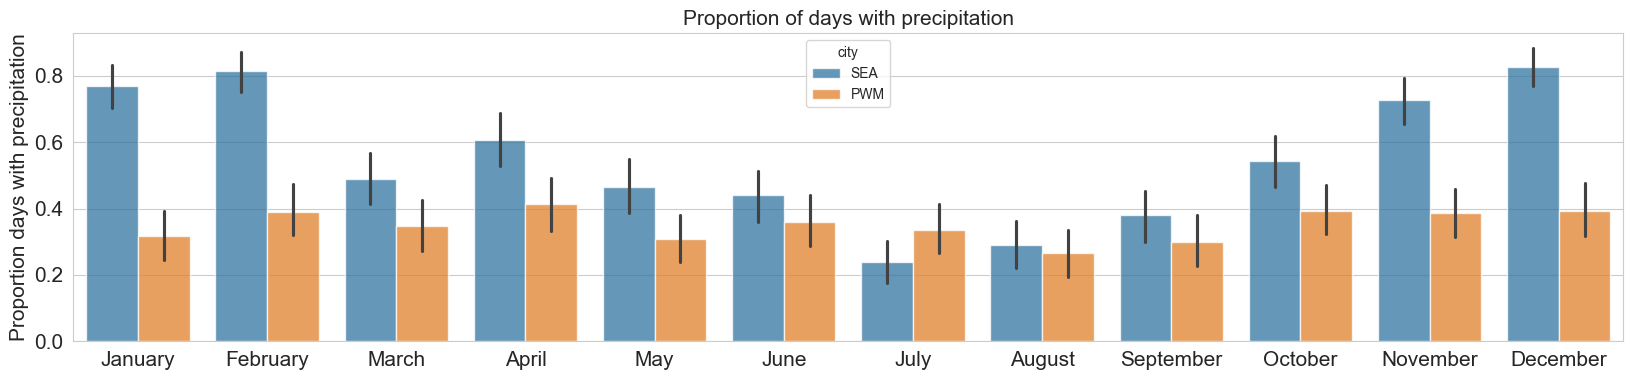

In [171]:
# Proportion of days with precipiation (by months)
plt.figure(figsize = (20, 4))

sns.barplot(data = df, x = 'month', y = 'any_precipitation', hue = 'city', alpha = 0.75)

plt.title('Proportion of days with precipitation', fontsize = 15)
plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize = 15)


plt.xticks(ticks=range(12), labels = month_names)
plt.tick_params(labelsize = 15)

plt.show()

## Summary

- Seattle has more rainy days overall, especially in the winter months, but the indivdual days are typically light.
- Portland had fewer rainy days, but the rainfall tends to be heavier.
- Seaonality is more pronounced in Seattle (wet winters, dry summers), Portland shows flatter seasonal pattern.

# Modeling

## Differences in the mean precipitation each month between the cities
$$H_0: \mu_{\text{Seattle, January}} = \mu_{\text{St. Louis, January}}$$
$$H_a: \mu_{\text{Seattle, January}} \neq \mu_{\text{St. Louis, January}}$$

$$\vdots$$

$$H_0: \mu_{\text{Seattle, December}} = \mu_{\text{St. Louis, December}}$$
$$H_a: \mu_{\text{Seattle, December}} \neq \mu_{\text{St. Louis, December}}$$

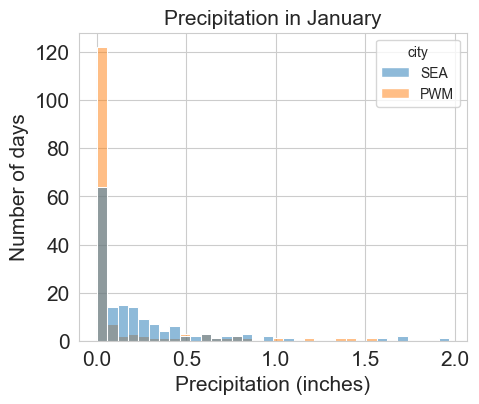

In [ ]:
plt.figure(figsize=(5, 4))

sns.histplot(data=df.loc[df['month'] == 1], x = 'precipitation', hue = 'city')

plt.xlabel('Precipitation (inches)', fontsize = 15)
plt.ylabel('Number of days', fontsize = 15)
plt.title('Precipitation in January', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.show()

In [217]:
from scipy import stats

significance_level = 0.05
significantly_different = np.zeros(12)

for month in range(1, 13):
    sea_data = df.loc[(df['city'] == 'SEA') & (df['month'] == month), 'precipitation']
    stl_data = df.loc[(df['city'] == 'PWM') & (df['month'] == month), 'precipitation']

    t_statistic, p_value = stats.ttest_ind(sea_data, stl_data, equal_var=False)

    if p_value < significance_level:
        significantly_different[month-1] = 1

    print(f"Month {month}:")
    print(f"  t-statistic = {t_statistic:.2f}")
    print(f"  p-value t test = {p_value:.3f}")
    print("-" * 20)

Month 1:
  t-statistic = 3.33
  p-value t test = 0.001
--------------------
Month 2:
  t-statistic = 1.27
  p-value t test = 0.203
--------------------
Month 3:
  t-statistic = -0.38
  p-value t test = 0.702
--------------------
Month 4:
  t-statistic = -1.82
  p-value t test = 0.070
--------------------
Month 5:
  t-statistic = 0.10
  p-value t test = 0.918
--------------------
Month 6:
  t-statistic = -1.61
  p-value t test = 0.108
--------------------
Month 7:
  t-statistic = -4.32
  p-value t test = 0.000
--------------------
Month 8:
  t-statistic = -3.60
  p-value t test = 0.000
--------------------
Month 9:
  t-statistic = -1.71
  p-value t test = 0.089
--------------------
Month 10:
  t-statistic = -1.76
  p-value t test = 0.080
--------------------
Month 11:
  t-statistic = 0.45
  p-value t test = 0.654
--------------------
Month 12:
  t-statistic = 1.38
  p-value t test = 0.168
--------------------


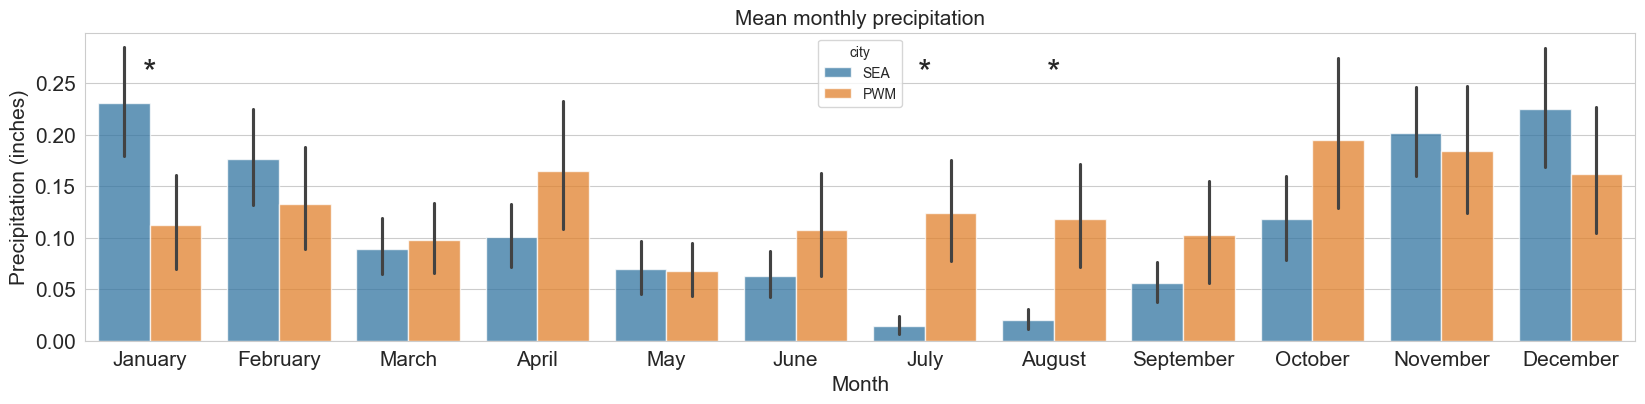

In [187]:
plt.figure(figsize = (20, 4))

sns.barplot(data = df, x = 'month', y = 'precipitation', hue = 'city', alpha = 0.75)

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)
plt.title('Mean monthly precipitation', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.xticks(ticks = range(12), labels = month_names)

for month in range(12):
    if significantly_different[month] == 1:

        plt.text(month, 0.25, '*', ha = 'center', fontsize=25)

plt.show()

## Differences in the proportion of days with any precipitation each month between the cities
$$H_0: p_{\text{Seattle, January}} = p_{\text{St. Louis, January}}$$
$$H_a: p_{\text{Seattle, January}} \neq p_{\text{St. Louis, January}}$$

$$\vdots$$

$$H_0: p_{\text{Seattle, December}} = p_{\text{St. Louis, December}}$$
$$H_a: p_{\text{Seattle, December}} \neq p_{\text{St. Louis, December}}$$

In [210]:
from statsmodels.stats.proportion import proportions_ztest

significance_level = 0.05
significantly_different_proportion = np.zeros(12)

for month in range(1, 13):

    contingency_table = pd.crosstab(
        df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any_precipitation']
    )

    days_with_precipitation = contingency_table[True]

    total_counts = contingency_table.sum(axis=1)

    zstat, p_value = proportions_ztest(
        count=days_with_precipitation, nobs=total_counts, alternative='two-sided'
    )

    if p_value < significance_level:
        significantly_different_proportion[month-1] = 1

    print(f"Month {month}:")
    print(f"  z-statistic = {zstat:.2f}")
    print(f"  p-value = {p_value:.3f}")
    print("-" * 20)

Month 1:
  z-statistic = -7.98
  p-value = 0.000
--------------------
Month 2:
  z-statistic = -7.30
  p-value = 0.000
--------------------
Month 3:
  z-statistic = -2.53
  p-value = 0.011
--------------------
Month 4:
  z-statistic = -3.35
  p-value = 0.001
--------------------
Month 5:
  z-statistic = -2.80
  p-value = 0.005
--------------------
Month 6:
  z-statistic = -1.41
  p-value = 0.157
--------------------
Month 7:
  z-statistic = 1.88
  p-value = 0.060
--------------------
Month 8:
  z-statistic = -0.51
  p-value = 0.612
--------------------
Month 9:
  z-statistic = -1.46
  p-value = 0.144
--------------------
Month 10:
  z-statistic = -2.62
  p-value = 0.009
--------------------
Month 11:
  z-statistic = -5.93
  p-value = 0.000
--------------------
Month 12:
  z-statistic = -7.80
  p-value = 0.000
--------------------


In [ ]:
contingency_table = pd.crosstab(
        df.loc[df['month'] == 1, 'city'], df.loc[df['month'] == 1, 'any_precipitation']
    )

contingency_table

any_precipitation  False  True 
city                           
PWM                  106     49
SEA                   36    119


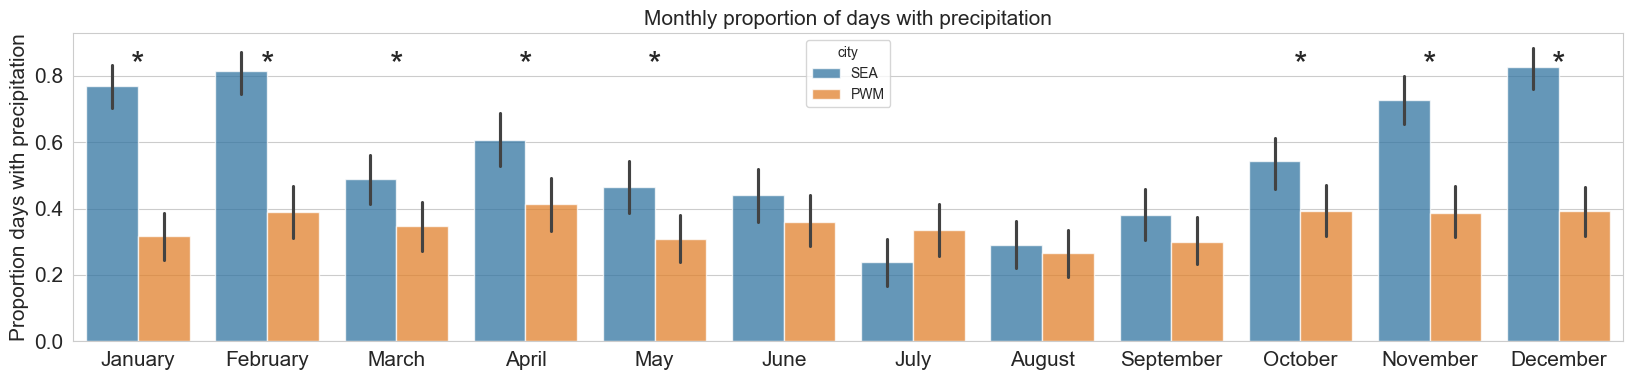

In [218]:
plt.figure(figsize = (20, 4))

sns.barplot(data = df, x = 'month', y = 'any_precipitation', hue = 'city', alpha = 0.75)

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize = 15)
plt.title('Monthly proportion of days with precipitation', fontsize = 15)

plt.xticks(ticks = range(12), labels = month_names)
plt.tick_params(labelsize=15)

for month in range(12):
    if significantly_different_proportion[month] == 1:

        plt.text(month, 0.8, '*', ha='center', fontsize = 25)

plt.show()

## Summary

- Seattle: Rain falls on more days overall, especially in the winter and spring, but the daily amounts tend to be lighter.
- Portland: Rain falls on fewer days overall, but the daily amounts tend to be higher, especially in the summer.